In [56]:
# https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
# !kaggle --version
# !kaggle --help
# !kaggle datasets download -d andrewmvd/heart-failure-clinical-data
# !unzip heart-failure-clinical-data.zip
# !rm heart-failure-clinical-data.zip

In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import autosklearn
import autosklearn.metrics
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

In [58]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


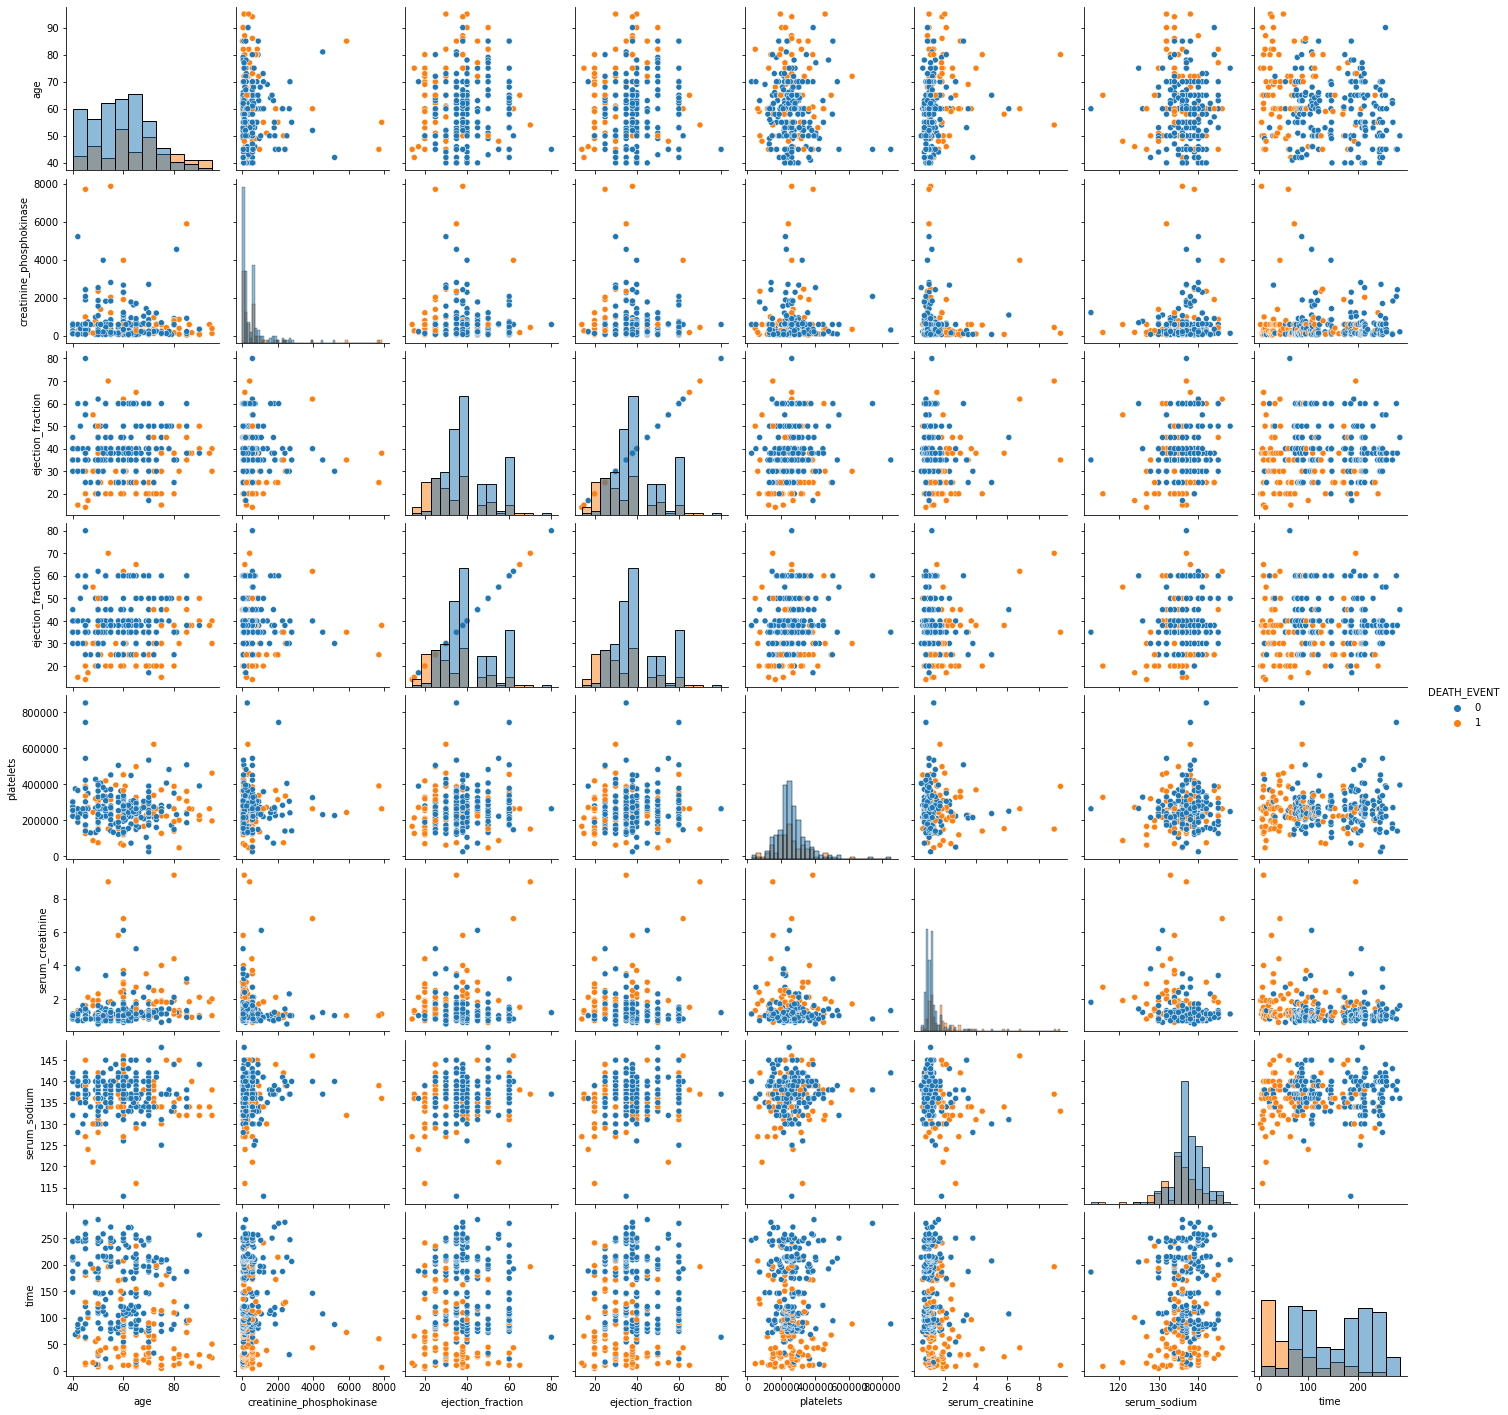

In [50]:
columns_to_plot=[
  "age", "creatinine_phosphokinase",
  "ejection_fraction", "ejection_fraction",
  "platelets", "serum_creatinine",
  "serum_sodium", "time"
]
plot = sns.pairplot(
  df,
  hue="DEATH_EVENT",
  # diag_kind="kde",
  diag_kind="hist",
  x_vars=columns_to_plot,
  y_vars=columns_to_plot,
  # corner=True
);

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [52]:
def get_and_fit_model(X_train, y_train, dataset_name, time_left_for_this_task=30, per_run_time_limit=10):
  model = AutoSklearnClassifier(
    # time_left_for_this_task=30,
    # per_run_time_limit=10
    time_left_for_this_task=time_left_for_this_task,
    per_run_time_limit=per_run_time_limit
  )
  model.fit(X_train, y_train, dataset_name=dataset_name)
  return model

In [53]:
model = get_and_fit_model(X_train, y_train, dataset_name="HeartFailure", time_left_for_this_task=120, per_run_time_limit=30)
# model = get_and_fit_model(X_train, y_train, dataset_name="HeartFailure", time_left_for_this_task=30, per_run_time_limit=10)

In [54]:
def get_scores_and_predictions(model, X_train, y_train, X_test, y_test):
  training_score = model.score(X_train, y_train)
  testing_score = model.score(X_test, y_test)
  predictions = model.predict(X_test)
  predictions_probas = model.predict_proba(X_test)
  return training_score, testing_score, predictions, predictions_probas

In [55]:
training_score, testing_score, predictions, predictions_probas = get_scores_and_predictions(model, X_train, y_train, X_test, y_test)
print("training_score: {training_score}".format(training_score=training_score))
print("testing_score: {testing_score}".format(testing_score=testing_score))
print("predictions: {predictions}".format(predictions=predictions))
print("predictions_probas: {predictions_probas}".format(predictions_probas=predictions_probas))

training_score: 0.9665071770334929
testing_score: 0.7444444444444445
predictions: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0]
predictions_probas: [[0.66521526 0.33478474]
 [0.87147189 0.12852811]
 [0.85671613 0.14328387]
 [0.21499162 0.78500838]
 [0.7637915  0.2362085 ]
 [0.83956727 0.16043273]
 [0.58627593 0.41372407]
 [0.72006086 0.27993914]
 [0.24193924 0.75806076]
 [0.76444199 0.23555801]
 [0.61512543 0.38487457]
 [0.73900802 0.26099198]
 [0.81152635 0.18847365]
 [0.76501205 0.23498795]
 [0.59500021 0.40499979]
 [0.56730463 0.43269537]
 [0.85243056 0.14756944]
 [0.70343805 0.29656195]
 [0.64922847 0.35077153]
 [0.71685571 0.28314429]
 [0.53662158 0.46337842]
 [0.50292368 0.49707632]
 [0.68867799 0.31132201]
 [0.46376526 0.53623474]
 [0.3569189  0.6430811 ]
 [0.90457292 0.09542708]
 [0.87937417 0.12062583]
 [0.78525499 0.21474501]
 [0.76187535 0

In [75]:
accuracy_score=sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy_score)
precision_score=sklearn.metrics.precision_score(y_test, predictions)
print(precision_score)

0.7444444444444445
0.8181818181818182


Numerical values of the confusion matrix
[[49  4]
 [19 18]]
**************************************************


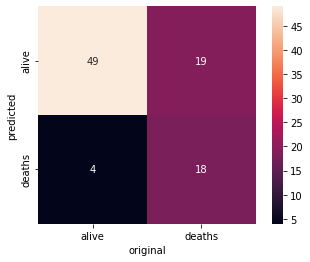

In [73]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

#Matplotlib is a Python visualization library
import matplotlib.pyplot as plt

#Set matplotlib visualization style
# plt.style.use('classic')

# specifiy matplotlib graphs are shown "inline" in the ouput
# %matplotlib inline

# Seabonr is  a Python data visualization library based on matplotlib
# import seaborn as sns
# sns.set()

matrix = confusion_matrix(y_test, predictions)
print("Numerical values of the confusion matrix")
print(matrix)
print("*"*50)
labels = ['alive','deaths']  # keep the alphanumeric order of the original class labels!
sns.heatmap(matrix.T,square=True, annot=True, fmt='d', cbar=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('original')
plt.ylabel('predicted');


In [63]:
def get_metrics(y_test, test_predictions):
  # print(autosklearn.metrics.REGRESSION_METRICS)
  mean_squared_error=autosklearn.metrics.mean_squared_error(y_test, test_predictions)
  MSE = np.mean((y_test - test_predictions) ** 2)
  mean_absolute_error=autosklearn.metrics.mean_absolute_error(y_test, test_predictions)
  MAE = np.mean(np.absolute(y_test - test_predictions))
  r2=autosklearn.metrics.r2(y_test, test_predictions)
  return mean_squared_error, MSE, mean_absolute_error, MAE, r2

In [18]:
predictions = model.predict(X_test)
predictions_probas = model.predict_proba(X_test)

In [19]:
predictions[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [22]:
model.sprint_statistics()
score = sklearn.metrics.accuracy_score(y_test, predictions)

In [23]:
print(score)

0.7555555555555555
